In [1]:
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement, plot_resonator, noise_fit
plt.rcParams['font.size'] = 11
from kid_readout.measure import measurement, nc
from kid_readout.measure.load import stream_from_rnc, sweep_from_rnc, sweepstream_from_rnc

updated file list


/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
nc_filename= '/data/readout/2015-07-06_164951_compressor_noise_0.120_K.nc'
rnc = readoutnc.ReadoutNetCDF(nc_filename)

In [3]:
len(rnc.sweeps)

2

In [4]:
len(rnc.timestreams)

2

In [5]:
channel=8
on_index = 0
off_index = 1

In [6]:
ss_on = sweepstream_from_rnc(rnc, sweep_index=on_index, stream_index=on_index, channel=channel)
ss_on._set_i_and_x(deglitch=False)
ss_off = sweepstream_from_rnc(rnc, sweep_index=off_index, stream_index=off_index, channel=channel)
ss_off._set_i_and_x(deglitch=False)

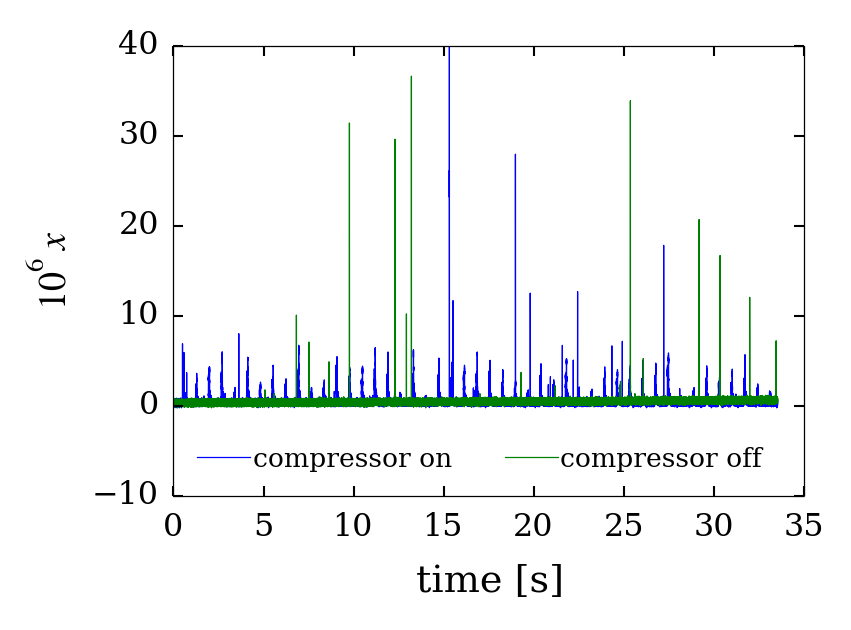

In [88]:
fig, ax = plt.subplots()

ax.plot(ss_on.stream.epoch - ss_on.stream.epoch.min(),
        1e6 * ss_on.x,
        label='compressor on')

ax.plot(ss_off.stream.epoch - ss_off.stream.epoch.min(),
        1e6 * ss_off.x,
        label='compressor off')

ax.legend(loc='best', fontsize='xx-small', ncol=2)
ax.set_xlabel('time [s]')
ax.set_ylabel('$10^6 x$')
ax.set_ylim(-10, 40);

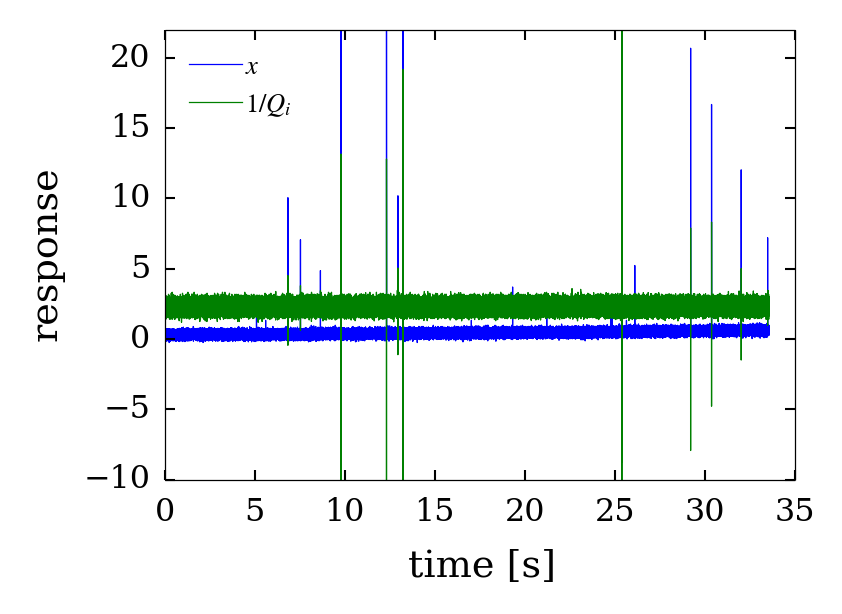

In [94]:
fig, ax = plt.subplots()

ax.plot(ss_off.stream.epoch - ss_off.stream.epoch.min(),
        1e6 * ss_off.x,
        label='$x$')


ax.plot(ss_off.stream.epoch - ss_off.stream.epoch.min(),
        1e6 * ss_off.i,
        label='$1 / Q_i$')

ax.legend(loc='best', fontsize='xx-small')
ax.set_xlabel('time [s]')
ax.set_ylabel('response')
ax.set_ylim(-10, 22);

Find some glitches by hand

In [18]:
def epoch_mask(ss, start, stop, relative=True):
    if relative:
        epoch = ss.stream.epoch - ss.stream.epoch.min()
    else:
        epoch = ss.stream.epoch
    mask = ((start <= epoch) &
            (epoch < stop))
    return mask


In [19]:
event_times = []

In [96]:
mask1 = epoch_mask(ss_off, 9.77, 9.78)
mask2 = epoch_mask(ss_off, 29.2, 29.205)

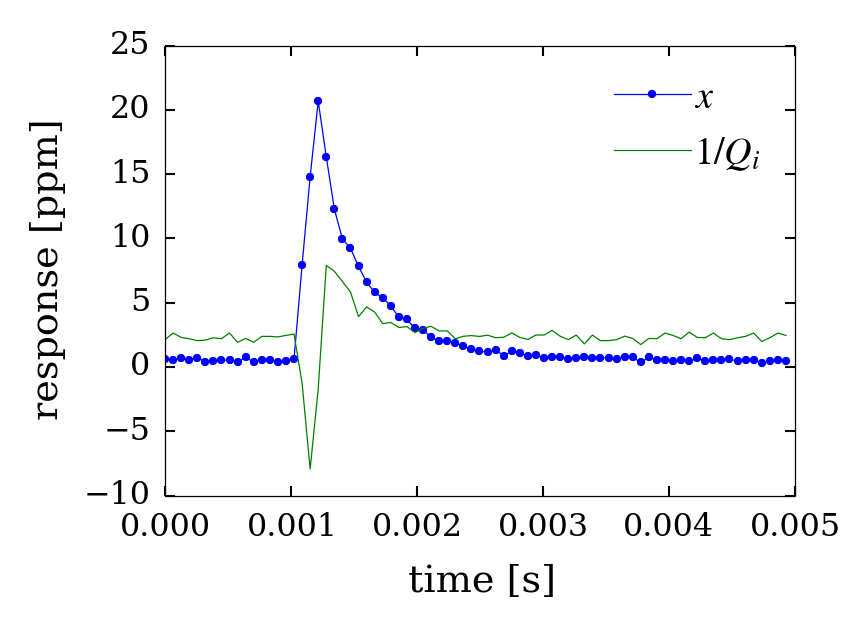

In [99]:
fig, ax = plt.subplots()
ax.plot(ss_off.stream.epoch[mask2] - ss_off.stream.epoch[mask2].min(),
        1e6 * ss_off.x[mask2],
        '.-', label='$x$')
ax.plot(ss_off.stream.epoch[mask2] - ss_off.stream.epoch[mask2].min(),
        1e6 * ss_off.i[mask2],
        label='$1 / Q_i$')

ax.legend(loc='best')
ax.set_xlabel('time [s]')
ax.set_ylabel('response [ppm]');

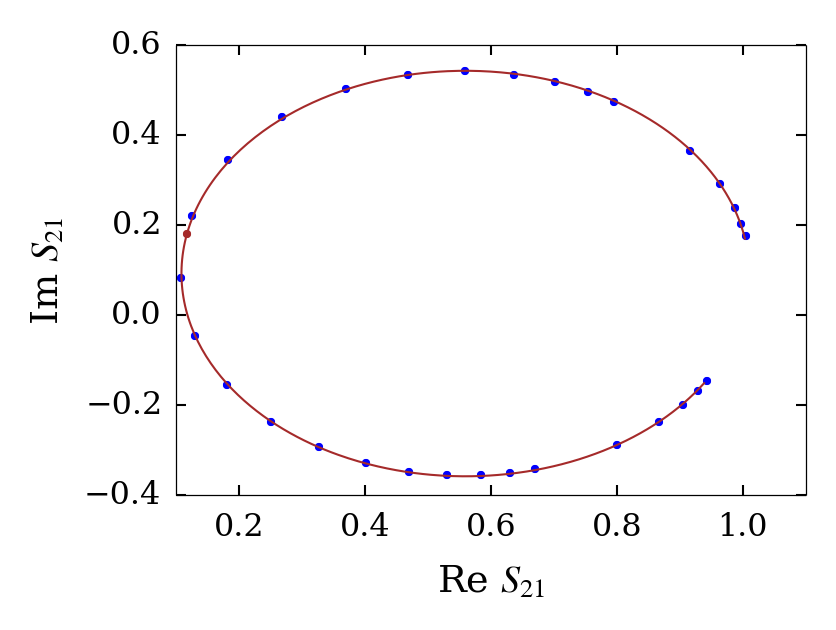

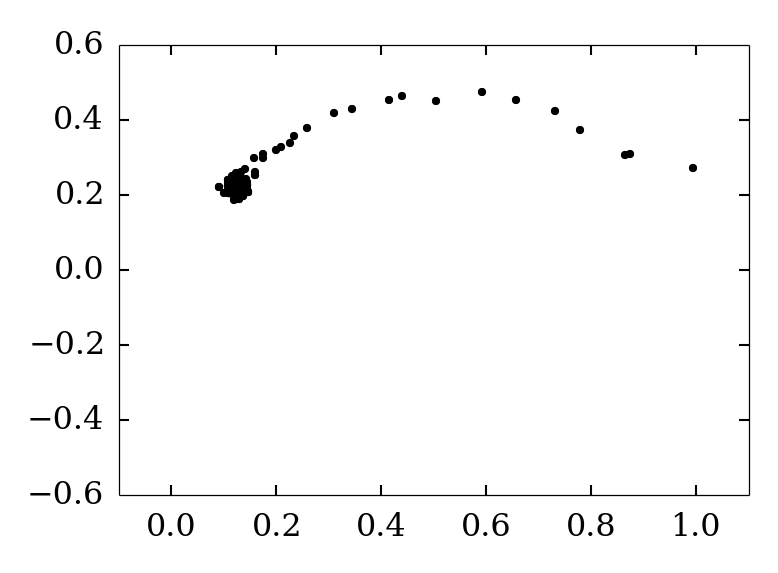

In [54]:
#fig, ax = plt.subplots()
fig = plot_resonator.IQ_circle(ss_off.sweep.resonator, normalize_s21=True)
ax = plt.gca()
ax.plot(ss_off.stream_s21_normalized[mask1].real,
        ss_off.stream_s21_normalized[mask1].imag, '.k')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.6, 0.6);